In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys

In [2]:
df = pd.read_csv("../../data/closeness.csv")

In [3]:
df_peaks = pd.read_csv("../../data/peak_nodes.csv")

In [4]:
top_1000 = pd.DataFrame(data=df.head(1000))

In [7]:
top_1000.rename(columns={'nodeId':'Node_ID:ID'}, inplace=True)

In [8]:
top_1000.head()

,Node_ID:ID,score
0,3611,1.0
1,3653,1.0
2,3663,1.0
3,3674,1.0
4,3683,1.0


In [9]:
df_peaks.head()

,SpecID,WaveNumber,Absorbance,Status:LABEL,GridID,Node_ID:ID
0,201210-1-00,618.90662,1842.5710,Normal,55,0
1,201210-1-00,696.81091,1851.9185,Normal,56,1
2,201210-1-00,901.13898,1746.4041,Normal,61,2
3,201210-1-00,996.12756,1702.7238,Normal,62,3
4,201210-1-00,1050.11390,1674.6296,Normal,64,4


In [12]:
same_sample = pd.merge(df_peaks, top_1000, on='Node_ID:ID', how='inner')

In [13]:
same_sample

,SpecID,WaveNumber,Absorbance,Status:LABEL,GridID,Node_ID:ID,score
0,201210-2-36,1349.43050,4500.9146,Normal,195,1235,0.348552
1,201210-2-37,1096.58310,4462.1802,Normal,190,1275,0.348545
2,201210-2-37,1119.81770,4513.9854,Normal,191,1276,0.352429
3,201210-2-37,1129.38500,4526.0918,Normal,191,1277,0.352429
4,201210-2-38,1079.49890,4582.4434,Normal,190,1325,0.346385
...,...,...,...,...,...,...,...
995,210519-1-14,977.67651,1306.9001,Hyperglycemia,62,91644,0.361316
996,210519-1-34,1000.22780,1103.8972,Hyperglycemia,63,91915,0.352449
997,210519-1-36,607.28931,1012.0805,Hyperglycemia,55,91938,0.342279
998,210519-2-14,1000.22780,1088.3574,Hyperglycemia,63,92270,0.346562


In [15]:
normal = 0
hyper = 0
hypo = 0

for i, r in same_sample.iterrows():
    if r['Status:LABEL'] == 'Normal':
        normal += 1
    elif r['Status:LABEL'] == 'Hypoglycemia':
        hypo += 1
    elif r['Status:LABEL'] == 'Hyperglycemia':
        hyper += 1

Normal = (normal/1000) * 100
Hyper = (hyper/1000) * 100
Hypo = (hypo/1000) * 100

print("Closeness centrality top 1000 percentage:")
print(f'Normal: {Normal}%')
print(f'Hypoglycemia: {Hypo}%')
print(f'Hperglycemia: {Hyper}%')

Closeness centrality top 1000 percentage:
Normal: 28.799999999999997%
Hypoglycemia: 44.2%
Hperglycemia: 27.0%


<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

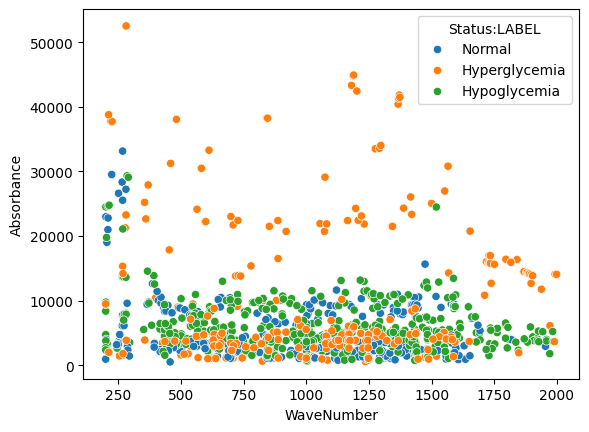

In [17]:
sns.scatterplot(data=same_sample, x="WaveNumber", y="Absorbance", hue="Status:LABEL")